# Task 1: Pivot Table and Heatmap with Iris Dataset
- Load the Iris dataset.
- Train three different classification models (Logistic Regression, Decision Tree, K-Nearest Neighbors).
- Evaluate their performance using the metrics: Accuracy, Precision, Recall, F1-Score.
- Create a pivot table summarizing the mean value of each metric per model.
- Visualize this pivot table using a heatmap.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']
models = [
    LogisticRegression(max_iter=200),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# Define metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1-Score': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation and collect results
results = {'Model': [], 'Metric': [], 'Value': []}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in zip(model_names, models):
    for metric_name in scoring.keys():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring[metric_name])
        results['Model'].extend([model_name]*len(scores))
        results['Metric'].extend([metric_name]*len(scores))
        results['Value'].extend(scores)

df_results = pd.DataFrame(results)
# df_results

Metric               Accuracy  F1-Score  Precision    Recall
Model                                                       
Decision Tree        0.953333  0.953115   0.957239  0.953333
K-Nearest Neighbors  0.966667  0.966650   0.967273  0.966667
Logistic Regression  0.966667  0.966515   0.969495  0.966667


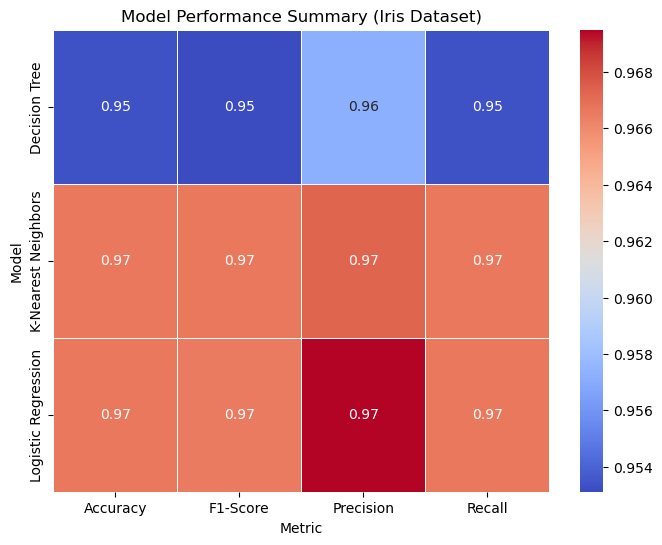

In [3]:
# Create a pivot table summarizing the mean value of each metric per model
pivot_table = df_results.pivot_table(values='Value', index='Model', columns='Metric', aggfunc='mean')
print(pivot_table)

# Visualize the pivot table using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Model Performance Summary (Iris Dataset)')
plt.show()


# Task 2: ANOVA Table and Visualization
- Using the evaluation results from Task 1, perform a one-way ANOVA test to determine if there are statistically significant differences between the models' performances for each metric.
 - Create a table displaying the F-statistics and p-values.
- Visualize the p-values using a heatmap.

In [4]:
# Import necessary library for ANOVA
from scipy.stats import f_oneway
import pandas as pd

# Prepare data for ANOVA
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
anova_results = pd.DataFrame(columns=['Metric', 'F-Statistic', 'p-Value'])

for metric in metrics:
    values_lr = df_results[(df_results['Model'] == 'Logistic Regression') & (df_results['Metric'] == metric)]['Value']
    values_dt = df_results[(df_results['Model'] == 'Decision Tree') & (df_results['Metric'] == metric)]['Value']
    values_knn = df_results[(df_results['Model'] == 'K-Nearest Neighbors') & (df_results['Metric'] == metric)]['Value']
    
    # Perform one-way ANOVA
    F_stat, p_val = f_oneway(values_lr, values_dt, values_knn)
    
    # Create a new DataFrame row with the results
    new_row = pd.DataFrame({
        'Metric': [metric],
        'F-Statistic': [F_stat],
        'p-Value': [p_val]
    })
    
    # Concatenate the new row with the existing DataFrame
    anova_results = pd.concat([anova_results, new_row], ignore_index=True)

print(anova_results)

      Metric  F-Statistic   p-Value
0   Accuracy     0.242424  0.788475
1  Precision     0.188619  0.830510
2     Recall     0.242424  0.788475
3   F1-Score     0.245759  0.785952


/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_41379/2697347272.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_results = pd.concat([anova_results, new_row], ignore_index=True)


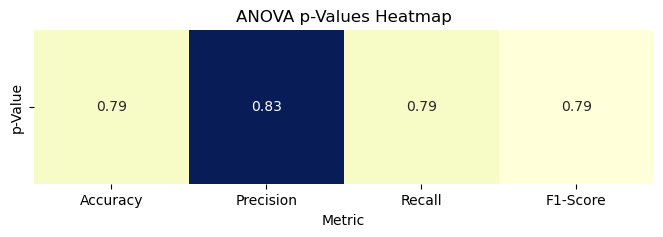

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming anova_results DataFrame has the correct structure
anova_pivot = anova_results.set_index('Metric')[['p-Value']].T

# Plot the heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(anova_pivot, annot=True, cmap='YlGnBu', cbar=False)
plt.title('ANOVA p-Values Heatmap')
plt.show()

# Task 3: Calibration Plot for Probabilistic Classifier on Breast Cancer Dataset

- Load the Breast Cancer dataset.
- Train a probabilistic classifier (e.g., Logistic Regression).
- Plot the calibration curve to assess how well the predicted probabilities reflect the true probabilities.


In [16]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



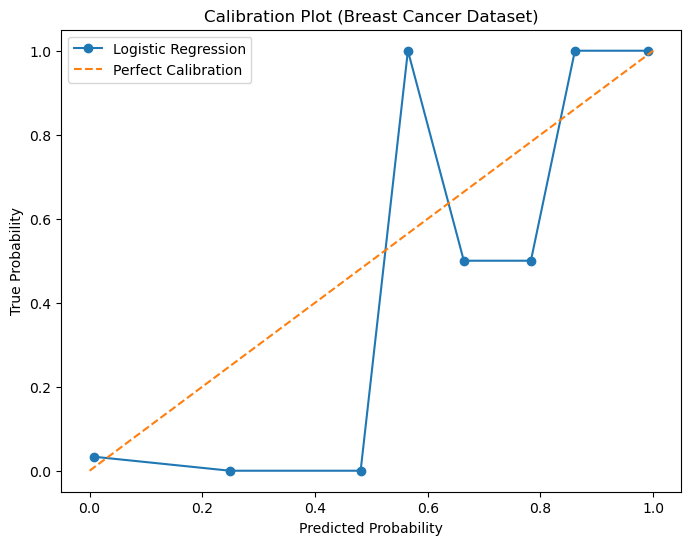

In [17]:
# Train a Logistic Regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
print(report)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot (Breast Cancer Dataset)')
plt.legend()
plt.show()


              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



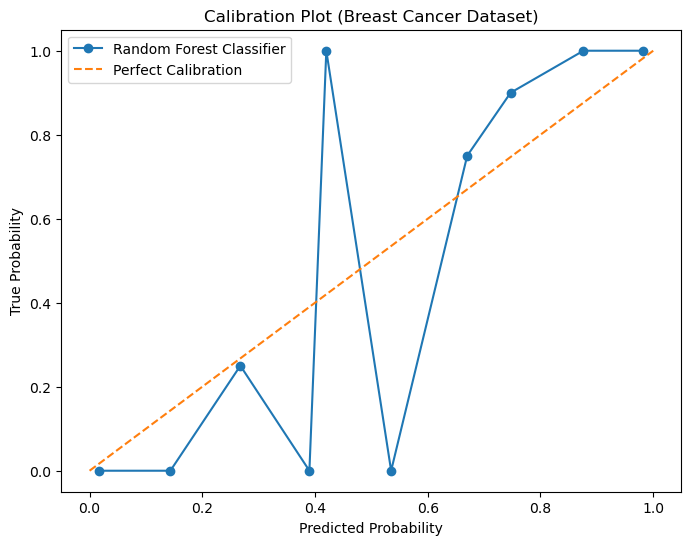

In [20]:
# Train a Random Forest Classifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
print(report)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot (Breast Cancer Dataset)')
plt.legend()
plt.show()

# Task 4: Residual Plot for Regression Model on California Housing Dataset

- Load the California Housing dataset.
- Train a regression model (e.g., Linear Regression) to predict median house values.
- Plot the residuals to assess the model fit.
- Identify any patterns that suggest model inadequacy.

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RMSE: 0.7284008391515455
R2 Score: 0.595770232606166


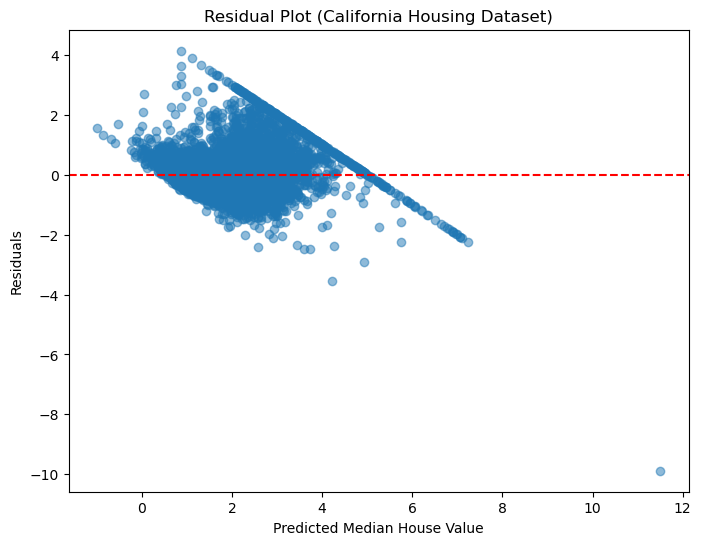

In [6]:
# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot (California Housing Dataset)')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.069240
RMSE: 0.45883456428120517
R2 Score: 0.8396017339768946


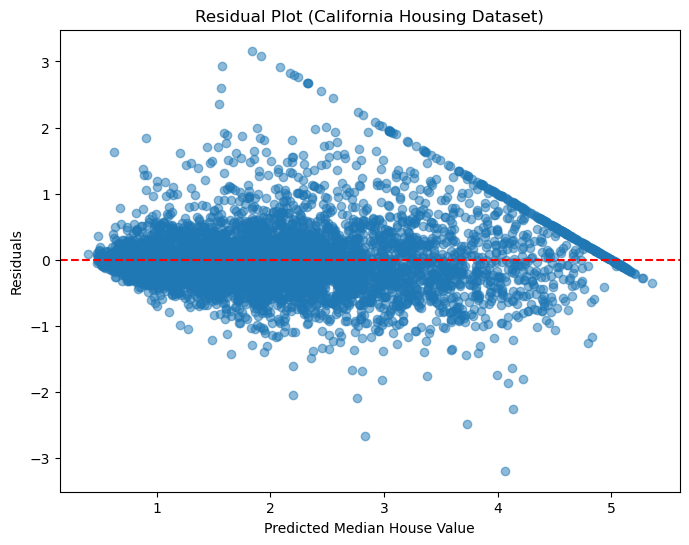

In [8]:
# Train an LGBM Regressor model
regressor = LGBMRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot (California Housing Dataset)')
plt.show()

# Task 5: Comparing Model Performances Across Multiple Metrics on Breast Cancer Dataset

- Perform 5-fold cross-validation for three different classifiers (Logistic Regression, Support Vector Machine, Gradient Boosting).
- Collect metrics: Accuracy, Precision, Recall, F1-Score, and ROC AUC.
- Create a box plot comparing the distributions of these metrics across the models.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_41859/1426279227.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)


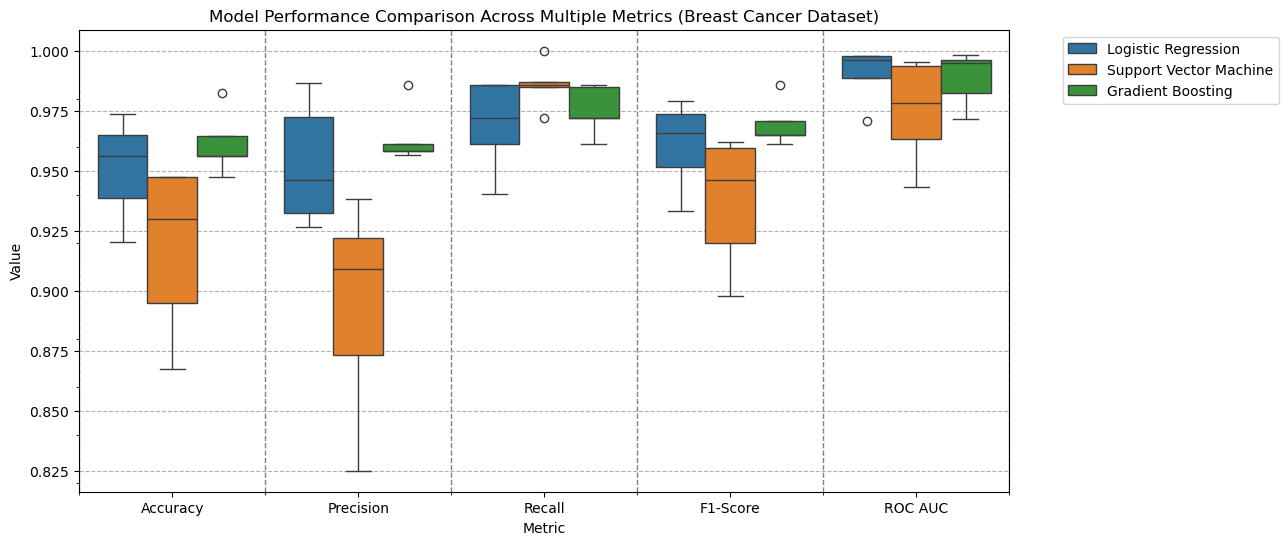

In [24]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize a DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, clf in classifiers.items():
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train_cv, X_test_cv = X[train_idx], X[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]
        
        clf.fit(X_train_cv, y_train_cv)
        y_pred_cv = clf.predict(X_test_cv)
        y_prob_cv = clf.predict_proba(X_test_cv)[:, 1] if hasattr(clf, "predict_proba") else np.zeros_like(y_pred_cv)
        
        # Collect metrics
        accuracy_list.append(accuracy_score(y_test_cv, y_pred_cv))
        precision_list.append(precision_score(y_test_cv, y_pred_cv, zero_division=1))
        recall_list.append(recall_score(y_test_cv, y_pred_cv, zero_division=1))
        f1_list.append(f1_score(y_test_cv, y_pred_cv, zero_division=1))
        roc_auc_list.append(roc_auc_score(y_test_cv, y_prob_cv))
    
    # Prepare metrics to append to the DataFrame
    metrics = {
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1-Score': f1_list,
        'ROC AUC': roc_auc_list
    }
    
    for metric_name, values in metrics.items():
        # Create a temporary DataFrame to hold this iteration's results
        temp_df = pd.DataFrame({
            'Model': model_name,
            'Metric': metric_name,
            'Value': values
        })
        # Use pd.concat instead of append
        metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)

# Create a box plot to compare the models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', hue='Model', data=metrics_df)

ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='--')
ax.get_yaxis().set_minor_locator(MultipleLocator(0.02))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='gray', lw=1, linestyle='--')

plt.title('Model Performance Comparison Across Multiple Metrics (Breast Cancer Dataset)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()



# Task 6: ROC and Precision-Recall Curves
- For one of the classifiers from Task 5, plot both the ROC curve and the Precision-Recall curve.
- Discuss which curve might be more informative given the dataset's class imbalance.

In [13]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

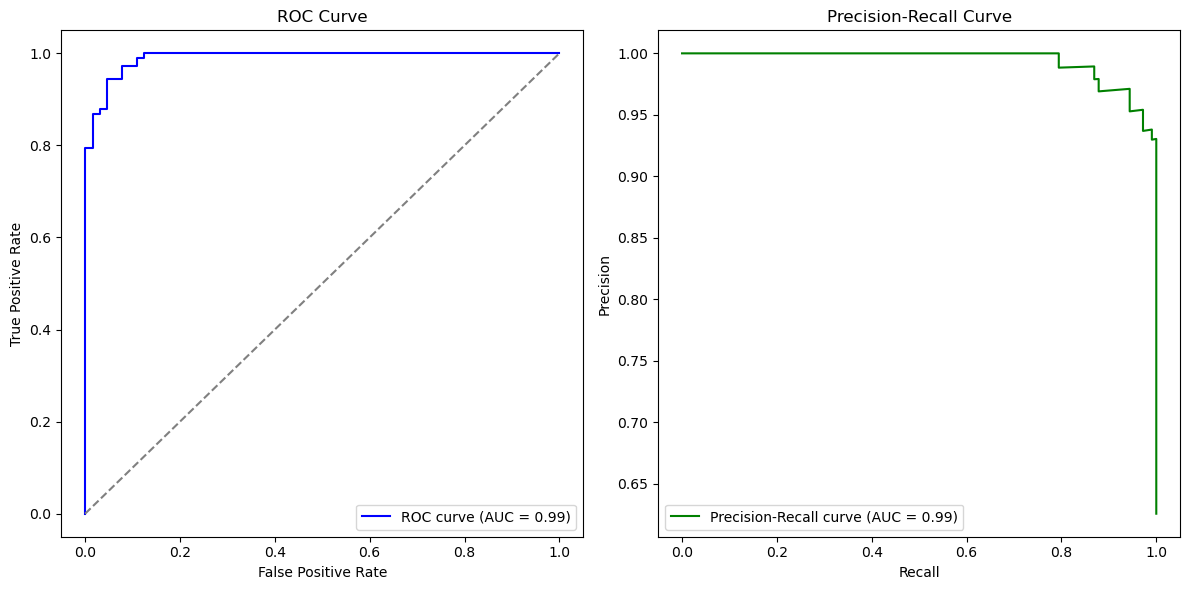

In [14]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color="green", label=f"Precision-Recall curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

- Discussion: ROC Curve vs. Precision-Recall Curve
    - The Breast Cancer dataset is imbalanced, with more benign samples than malignant ones. In such cases:

        - ROC Curve: Useful for evaluating the classifier's ability to distinguish between classes but can be misleading in imbalanced datasets since it includes true negatives, which are abundant here.
        - Precision-Recall Curve: Often more informative in imbalanced scenarios because it focuses on the positive class (malignant cases here) and provides insight into how well the model identifies the minority class.

    - Therefore, in this case, the Precision-Recall Curve is likely more informative because it directly evaluates the model's performance on identifying malignant cases, which is crucial in imbalanced datasets where the minority class is of particular interest.